In [2]:
import numpy as np 
import os
from skimage.transform import resize
from skimage import io, img_as_ubyte
import h5py
from skimage.filters import roberts, sobel
from skimage.color import rgb2lab, rgb2gray
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py
from skimage import io
from scipy import spatial

In [3]:
def extract_features(image):
    lab_image = rgb2lab(image)
    A_image = lab_image[:,:,1]
    A_feat = A_image.mean()
    B_image = lab_image[:,:,2]
    B_feat = B_image.mean()

    gray_image = rgb2gray(image)
    gray_image = resize(gray_image, (256,256))
    gray_image = img_as_ubyte(gray_image)

    entropy_image = entropy(gray_image, disk(3))
    entropy_mean = entropy_image.mean()
    entropy_std = entropy_image.std()
    roberts_image = roberts(gray_image)
    robert_mean = roberts_image.mean()
    sobel_image = sobel(gray_image)
    sobel_mean = sobel_image.mean()

  
    kernel1 = cv2.getGaborKernel((9, 9), 3, np.pi/4, np.pi, 0.5, 0, ktype=cv2.CV_32F)
    gabor1 = (cv2.filter2D(gray_image, cv2.CV_8UC3, kernel1)).mean()

 
    kernel2 = cv2.getGaborKernel((9, 9), 3, np.pi/2, np.pi/4, 0.9, 0, ktype=cv2.CV_32F)
    gabor2 = (cv2.filter2D(gray_image, cv2.CV_8UC3, kernel2)).mean()

    kernel3 = cv2.getGaborKernel((9, 9), 5, np.pi/2, np.pi/2, 0.1, 0, ktype=cv2.CV_32F)
    gabor3 = (cv2.filter2D(gray_image, cv2.CV_8UC3, kernel3)).mean()
    custom_features = np.array([A_feat, B_feat, entropy_mean, entropy_std, robert_mean, sobel_mean, gabor1, gabor2, gabor3])

    return custom_features

In [4]:
if __name__ == "__main__":
    path = "/Users/sudipkhadka/Desktop/Computer-Vision2/Embedding_imges/"

    feats = []
    names = []

    for img in os.listdir(path):
        if img == ".DS_Store":
            continue
        print("Extracting features from image: ", img)
        image = io.imread(os.path.join(path, img))

        X = extract_features(image)
        feats.append(X)
        names.append(img)
    feats = np.array(feats)
    feature_file = "CustomFeatures.h5"
    print("Saving features to h5 file")
    
    h5f = h5py.File(feature_file, "w")
    h5f.create_dataset('dataset_1', data = feats)
    h5f.create_dataset('dataset_2', data = np.string_(names))
    h5f.close()

Extracting features from image:  0b4ccf42a23a7335c0dd18686107a7b64c7e5421.jpg
Extracting features from image:  878bea5e0d3a5479583f9664803c7cf4db2168d7.jpg
Extracting features from image:  19dec6751c0f3ad362512021bc298558c0cca3c2.jpg
Extracting features from image:  00fdfea06fd6972b3b277d568f3620d9a25c448b.jpg
Extracting features from image:  0f5eca575a58ab234d395569c07b4358ae11cf0a.jpg
Extracting features from image:  3e44db86797ec088d0cbbb0c0757268499a3938e.jpg
Extracting features from image:  1dbe413882209a29e3a4e59a46509684078d573a.jpg
Extracting features from image:  505ac435719a4199fa9481d493d621e0949a3e61.jpg
Extracting features from image:  640db9308ed82144cccf8f36b2bc4b4638dbd1b7.jpg
Extracting features from image:  24aa4e14719f494e17c96fa3487e79f5a30e3a23.jpg
Extracting features from image:  0f83cdf1997c2dc39715bc5b298b28373fc5a984.jpg
Extracting features from image:  870dc5324dd92dc579df7efa9d3a08759978b9ff.jpg
Extracting features from image:  1b1e7b705cb6fd6fce780b1c70a28b4

In [5]:
h5f_file = h5py.File("CustomFeatures.h5", 'r')
feats = h5f_file['dataset_1'][:]
image_name = h5f_file['dataset_2'][:]
h5f_file.close()

In [6]:
paths = "/Users/sudipkhadka/Desktop/Computer-Vision2/Embedding_imges"

In [7]:
def reterive_similar_image(query_image_path):
    plt.imshow(io.imread(query_image_path))
    plt.title("Query Image")
    plt.show()  

    print("Reteriving Images.........") 
    X = extract_features(io.imread(query_image_path))
    scores = []
    for i in range(feats.shape[0]):
        score = 1 - spatial.distance.cosine(X, feats[i])
        scores.append(score)
    scores = np.array(scores)
    rank_id = np.argsort(scores)[::-1]
    rank_score = scores[rank_id]

    print("Similar Images")
    max_num_matches = 7

    lists = [os.path.join(paths, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(paths, image_name[index]) 
                for i, index in enumerate(rank_id[0:max_num_matches])]

    num_images = len(lists)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_path in enumerate(lists):
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)  
            axes[i].imshow(img)  
            axes[i].axis('off')  
            axes[i].set_title(f"Image Rank {i+1}")
        else:
            print(f"File not found: {image_path}") 
    plt.show()  

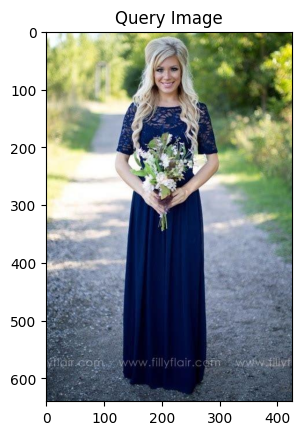

Reteriving Images.........
Similar Images


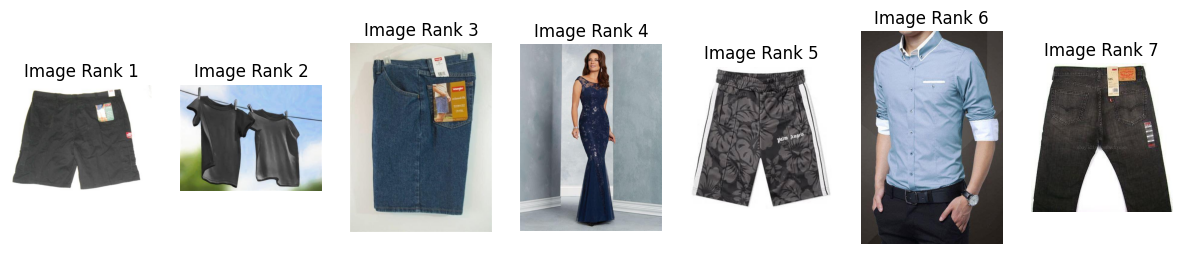

In [8]:
reterive_similar_image("/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa3b752a3b52957ec859b26b5dbf7457e8af2513.jpg")

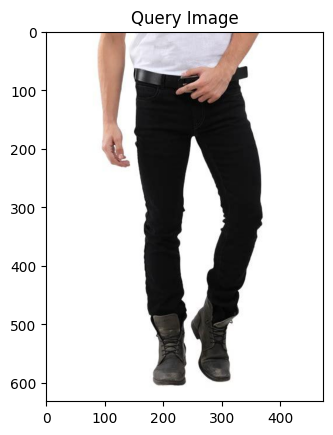

Reteriving Images.........
Similar Images


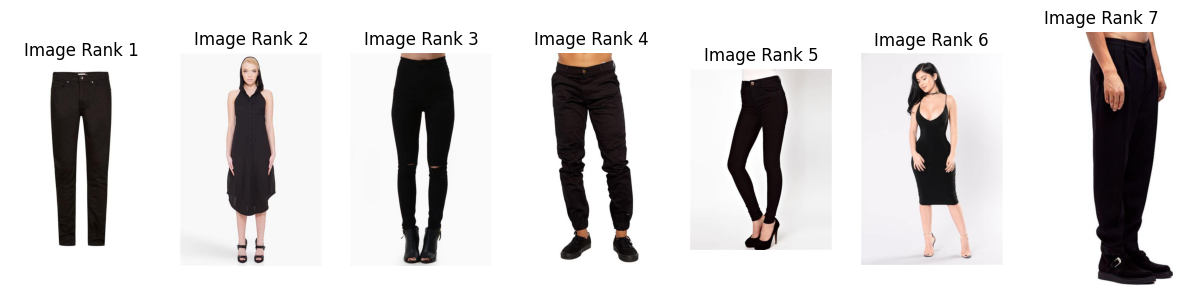

In [9]:
reterive_similar_image('/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa60dbf6735fbf1b90977e531d4a4023fc5ec34b.jpg')